# Outline of this notebook : model_building.ipynb

Part1 : EDA : Visualise how balance our new_dataset is


Part2 : Training and Test dataset Split

Part3 : Define and train the model (Machine Learning)
        1. GNB model
        2. Decision three model
        3. K near neighbor model
        4. Random Forest model

Part4 : Set evaluate metrix function
        1.AUC
        2.Report
        3.Confusion
        4.Rocfig

Part5 : Predict and evaluate metric
Part6 : Save Predict Result
Part7 : Save models

In [2]:
# Built In Imports
import pandas as pd
import joblib
# Visualization Imports
import seaborn as sns
import matplotlib.pyplot as plt
# Model Imports
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve

         click_id  user_id  store_id  device_label_class  \
1170884    604892   228625       331                   3   
666914    1632769   190192       389                   2   
430267    1305261   185292       424                   1   
1656210   1713228    92105       423                   2   
746583     950674    45453        40                   3   

         platform_label_class  channel_label_class  num_click_store  
1170884                     3                    9           182522  
666914                      4                   18            90523  
430267                      1                   46           107557  
1656210                     4                   46            47069  
746583                      3                    9           127643  
   store_id  new_device  new_platform  num_click_store  click_label
0       182           0             0           259871            1
1       182           1             0           259871            1
2       182    

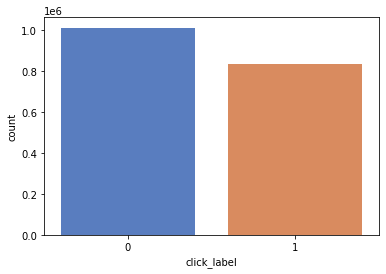

In [3]:
# Step1 EDA : Visualise how balance our new_dataset is
dataframe = pd.read_csv('./data_select_features/new_dataset_features.csv')
sns.countplot( x= "click_label", data = dataframe, palette= "muted")
# Step2 Training and Test dataset Split
X_train, X_test, y_train, y_test = train_test_split(dataframe.drop(['click_label'],axis=1),
                                                    dataframe['click_label'],
                                                    test_size=0.3,
                                                    random_state=0)

RandomForestClassifier()

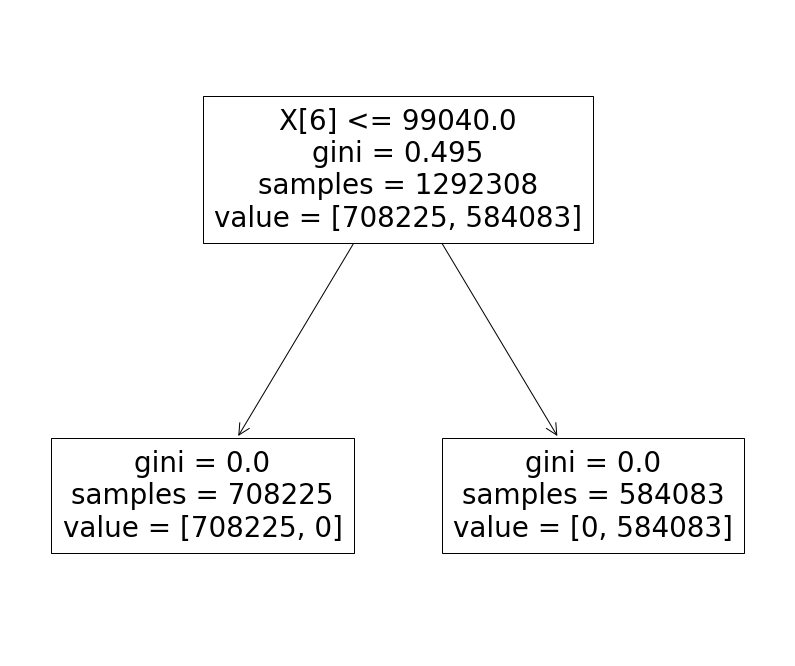

In [118]:
# Step3 Define and train the model (Machine Learning)
# GNB Model
GNB = GaussianNB()
GNB.fit(X_train, y_train)
train_score_GNB = GNB.score(X_train,y_train)
# Decision Three model
DT = tree.DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)
DT.fit(X_train,y_train) # Using default parameters
plt.figure(figsize=(14,12))
tree.plot_tree(DT)
# K Neighbors model
k=39
KN = KNeighborsClassifier(n_neighbors=k)
KN.fit(X_train, y_train) # Training the model
# RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100) # Define the model
RF.fit(X_train, y_train)

In [119]:
def evaluate_on_training_set(y_test, y_pred):
  # Calculate AUC
  print("AUC is: ", roc_auc_score(y_test,y_pred))#todo print AUC score)
  AUC = roc_auc_score(y_test,y_pred)
  # print out recall and precision
  print("classfication",classification_report(y_test, y_pred))
  report = classification_report(y_test, y_pred, output_dict= True)
  # print out confusion matrix
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
  confusion = confusion_matrix(y_test, y_pred)
  # # calculate points for ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  # Plot ROC curve
  #plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_score(y_test, y_pred))
  plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate or (1 - Specifity)')
  plt.ylabel('True Positive Rate or (Sensitivity)')
  plt.title('Receiver Operating Characteristic')
  rocfig = plt
  return AUC,report,confusion,rocfig

y_pred 1:  [1 0 1 ... 0 1 1]
AUC is:  0.9934616076710607
classfication               precision    recall  f1-score   support

           0       0.99      1.00      0.99    302643
           1       1.00      0.99      0.99    251204

    accuracy                           0.99    553847
   macro avg       0.99      0.99      0.99    553847
weighted avg       0.99      0.99      0.99    553847

Confusion Matrix: 
 [[302625     18]
 [  3270 247934]]
AUC is:  0.9934616076710607
classfication               precision    recall  f1-score   support

           0       0.99      1.00      0.99    302643
           1       1.00      0.99      0.99    251204

    accuracy                           0.99    553847
   macro avg       0.99      0.99      0.99    553847
weighted avg       0.99      0.99      0.99    553847

Confusion Matrix: 
 [[302625     18]
 [  3270 247934]]
evaluate2 :  (0.9934616076710607, {'0': {'precision': 0.9893100573726279, 'recall': 0.9999405239837036, 'f1-score': 0.99459

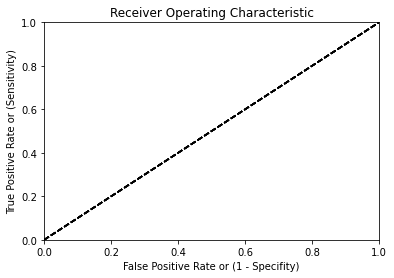

In [120]:
y_pred1 = GNB.predict(X_test)
print("y_pred 1: " , y_pred1)
evaluate_on_training_set(y_test, y_pred1)
print("evaluate2 : ", evaluate_on_training_set(y_test, y_pred1))

y_pred2 = DT.predict(X_test)
print("y_pred2 : " , y_pred2)
evaluate_on_training_set(y_test, y_pred2)
print("evaluate2 : ", evaluate_on_training_set(y_test, y_pred2))

y_pred3 = KN.predict(X_test)
print("y_pred3 : " , y_pred3)
evaluate_on_training_set(y_test, y_pred3)
print("evaluate4 : ", evaluate_on_training_set(y_test, y_pred3))

y_pred4 = RF.predict(X_test)
print("y_pred4 : " , y_pred4)
evaluate_on_training_set(y_test, y_pred4)
print("evaluate5 : ", evaluate_on_training_set(y_test, y_pred4))

AUC is:  0.9934616076710607
classfication               precision    recall  f1-score   support

           0       0.99      1.00      0.99    302643
           1       1.00      0.99      0.99    251204

    accuracy                           0.99    553847
   macro avg       0.99      0.99      0.99    553847
weighted avg       0.99      0.99      0.99    553847

Confusion Matrix: 
 [[302625     18]
 [  3270 247934]]
AUC is:  1.0
classfication               precision    recall  f1-score   support

           0       1.00      1.00      1.00    302643
           1       1.00      1.00      1.00    251204

    accuracy                           1.00    553847
   macro avg       1.00      1.00      1.00    553847
weighted avg       1.00      1.00      1.00    553847

Confusion Matrix: 
 [[302643      0]
 [     0 251204]]
AUC is:  1.0
classfication               precision    recall  f1-score   support

           0       1.00      1.00      1.00    302643
           1       1.00      1.

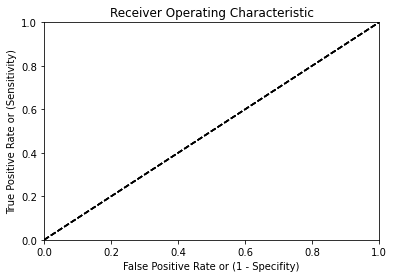

In [121]:
# Store GNB RESULT
AUC_GNB,report_GNB,confusion_GNB,rocfig_GNB =evaluate_on_training_set(y_test, y_pred1)
rocfig_GNB.savefig('./result/GNB/GNBroc.png')
df = pd.DataFrame(report_GNB).transpose()
df.to_excel('./result/GNB/GNBreport.xlsx')
pd.DataFrame(confusion_GNB).to_csv('./result/GNB/GNBconfusion.csv')

# Store DT RESULT
AUC_DT,report_DT,confusion_DT,rocfig_DT =evaluate_on_training_set(y_test, y_pred2)
rocfig_DT.savefig('./result/DT/DTroc.png')
df = pd.DataFrame(report_DT).transpose()
df.to_excel('./result/DT/DTreport.xlsx')
pd.DataFrame(confusion_DT).to_csv('./result/DT/DTconfusion.csv')

# Store KN RESULT
AUC_KN,report_KN,confusion_KN,rocfig_KN =evaluate_on_training_set(y_test, y_pred3)
rocfig_KN.savefig('./result/KN/KNroc.png')
df = pd.DataFrame(report_KN).transpose()
df.to_excel('./result/KN/KNreport.xlsx')
pd.DataFrame(confusion_KN).to_csv('./result/KN/KNconfusion.csv')

# Store KN RESULT
AUC_RF,report_RF,confusion_RF,rocfig_RF =evaluate_on_training_set(y_test, y_pred4)
rocfig_KN.savefig('./result/RandomForest/RFroc.png')
df = pd.DataFrame(report_RF).transpose()
df.to_excel('./result/RandomForest/RFreport.xlsx')
pd.DataFrame(confusion_RF).to_csv('./result/RandomForest/RFconfusion.csv')

In [122]:
joblib.dump(GNB, './train_models/GNB9.sav')
joblib.dump(DT, './train_models/DecisionThree.sav')
joblib.dump(KN, './train_models/KNeighborsClassifier.sav')
joblib.dump(RF, './train_models/RandomForest.sav')

['./train_models/RandomForest.sav']

In [ ]:
# # Step8 Define and train the model (Deep Learning)
# import os
# import numpy as np
# import keras
# from keras.models import Sequential
# from keras.layers import Activation, Dropout, Flatten, Dense
# from keras.layers import Conv1D, ZeroPadding1D, AveragePooling1D,MaxPooling1D
# from keras import optimizers
# from keras import applications
# from keras.models import Model
# from keras.callbacks import History
# from contextlib import redirect_stdout
#
# # plot the training loss and accuracy
# def plotResults(epochs,history):
#     plt.figure()
#     N = epochs
#     plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
#     plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
#     plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
#     plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
#
#     # make the graph understandable:
#     plt.title("Training Loss and Accuracy")
#     plt.xlabel("Epoch #")
#     plt.ylabel("Loss/Accuracy")
#     plt.legend(loc="upper left")
#     return plt
#
# num_classes = 2
# input_shape = (13,)
# # Convert class vectors to binary class matrices. This uses 1 hot encoding.
# y_train_cnn = keras.utils.to_categorical(y_train, num_classes)
# y_test_cnn = keras.utils.to_categorical(y_test, num_classes)
# x_train_cnn = X_train.reshape(X_train.shape[0], 13,1)
# x_test_cnn = X_test.reshape(X_test.shape[0], 13,1)
#
# CNN = Sequential()
# # layer 1
# CNN.add(Conv1D(128, (2), input_shape=(13,1),activation='relu'))
# CNN.add(MaxPooling1D())
# CNN.add(Dropout(0.5))
# # layer 2
# CNN.add(Conv1D(256,(2),activation='relu'))
# CNN.add(MaxPooling1D(2))
# CNN.add(Dropout(0.5))
# # layer 3
# # CNN.add(Conv1D(128, (1),activation='relu'))
# # CNN.add(MaxPooling1D(2))
# # CNN.add(Dropout(0.5))
# # CNN.add(Conv1D(64,(2),activation='relu'))
# # layer 4
# CNN.add(Flatten())
# # Dense layer
# CNN.add(Dense(64,activation='relu'))
# CNN.add(Dense(16, activation='relu'))
# CNN.add(Dense(num_classes, activation='softmax'))
#
# CNN.compile(loss=keras.losses.categorical_crossentropy,
#               optimizer=keras.optimizers.Adadelta(),
#               metrics=['accuracy'])
#
# print(CNN.summary())
#
# batch_size = 20
# epochs = 20
# history = History()
# CNN.fit(x_train_cnn, y_train_cnn,
#           batch_size=batch_size,
#           epochs=epochs,
#           verbose=1,
#           callbacks=[history],
#           validation_data=(x_test_cnn, y_test_cnn))
#
# from contextlib import redirect_stdout
# with open('./result/CNN/modelsummary.txt', 'w') as f:
#     with redirect_stdout(f):
#         CNN.summary()
#
# #save training history
# pd.DataFrame.from_dict(history.history).to_csv('./result/CNN/CNNhistory3.csv')
# TrainLossAcc=plotResults(epochs,history)
# TrainLossAcc.savefig('./result/CNN/CNNTrainLossAcc3.png')
# #predict labels and evalutate
# y_pred=CNN.predict(x_test_cnn)
# y_pred = np.argmax(y_pred, axis=-1)
# AUC,report,confusion,rocfig = evaluate_on_training_set(y_test_cnn,y_pred)
#
#
# print(report)
# #save predict result
# rocfig.savefig('./result/CNN/CNNroc3.png')
# with open('./result/CNN/CNNreport3', 'w') as f:
#     [f.write('{0}:\n{1}\n'.format(key, value)) for key, value in report.items()]
#
# pred_fig.savefig('./result/CNN/CNNpred3.png')
# # save the model
# CNN.save('./trainedModel/CNN3')
# # load model
# # from tensorflow import keras
# # model = keras.models.load_model('path/to/location')

In [68]:
# def evaluate_on_training_set(y_test, y_pred):
#   # Calculate AUC
#   print("AUC is: ", roc_auc_score(y_test,y_pred))#todo print AUC score)
#   AUC = roc_auc_score(y_test,y_pred)
#   # print out recall and precision
#   print("classfication",classification_report(y_test, y_pred))
#   report = classification_report(y_test, y_pred, output_dict= True)
#   # print out confusion matrix
#   print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
#   confusion = confusion_matrix(y_test, y_pred)
#   # # calculate points for ROC curve
#   fpr, tpr, thresholds = roc_curve(y_test, y_pred)
#   # Plot ROC curve
#   #plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_score(y_test, y_pred))
#   plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
#   plt.xlim([0.0, 1.0])
#   plt.ylim([0.0, 1.0])
#   plt.xlabel('False Positive Rate or (1 - Specifity)')
#   plt.ylabel('True Positive Rate or (Sensitivity)')
#   plt.title('Receiver Operating Characteristic')
#   rocfig = plt
#   return AUC,report,confusion,rocfig

In [ ]:
#Task2 Multiclass classification
from sklearn import datasets
# from sklearn.multiclass import OneVsOneClassifier
# from sklearn.svm import LinearSVC
#
# X_train2, X_test2, y_train2, y_test2 = train_test_split(dataframe.drop(['merchant_id'],axis=1),
#                                                     dataframe['merchant_id'],
#                                                     test_size=0.3,
#                                                     random_state=0)
# clf = OneVsOneClassifier(LinearSVC(random_state = 0))
# clf.fit(X_train2,y_train2)
# y_pred2 = clf.predict(X_test2)
# print("y_pred2 : " , y_pred2)
# evaluate_on_training_set(y_test2, y_pred2)


/Users/chenyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/chenyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/chenyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/chenyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/chenyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWa

KeyboardInterrupt: 